Questão 1. Considere a função f(x) = x3-2x+4 no intervalo [-2,2] com h = 0,25.
Use aproximações por diferenças finitas progressivas, regressivas e centradas
para a primeira e segunda derivadas de modo a ilustrar graficamente qual
aproximação é mais acurada. Faça o gráfico de todas as três aproximações por
diferenças finitas da primeira derivada com a derivada teórica e faça o mesmo
também para a segunda derivada.

In [1]:
from utils import *
import numpy as np
import matplotlib.pyplot as plt
from math import factorial

In [2]:
function = lambda x: x**3 -2*x + 4
x0 = -2
x1 = 2
delta = 0.25
space = np.arange(x0, x1, delta)

In [3]:
def taylor(ordem, x, delta, val,derivadas):
    for n in range(0, ordem):
        val += derivadas[n % len(derivadas)](x) * (delta ** (n + 1)) / factorial(n + 1)
    return val

def erroVerdadeiro(valorVerdadeiro, valorAproximado):
    return valorVerdadeiro - valorAproximado

def erroRelativoPercentualVerdadeiro(valorVerdadeiro, valorAproximado):
    return abs(round(erroVerdadeiro(valorVerdadeiro, valorAproximado) / valorVerdadeiro * 100, 3))

In [4]:
derivadasCentrais = [PrimeiraDerivadaCentrada(function,delta),SegundaDerivadaCentrada(function,delta),TerceiraDerivadaCentrada(function,delta),QuartaDerivadaCentrada(function,delta)]
derivadasProgressivas = [PrimeiraDerivadaProgressiva(function,delta),SegundaDerivadaProgressiva(function,delta),TerceiraDerivadaProgressiva(function,delta),QuartaDerivadaProgressiva(function,delta)]
derivadasRegressivas = [PrimeiraDerivadaRegressiva(function,delta),SegundaDerivadaRegressiva(function,delta),TerceiraDerivadaRegressiva(function,delta),QuartaDerivadaRegressiva(function,delta)]

function_vals = [function(x) for x in space]
taylorCentralPrimeiraOrdem = [taylor(1, x0, delta, function(x),derivadasCentrais) for x in space]
taylorCentralSegundaOrdem = [taylor(2, x0, delta, function(x),derivadasCentrais) for x in space]
taylorProgressivoPrimeiraOrdem = [taylor(1, x0, delta, function(x),derivadasProgressivas) for x in space]
taylorProgressivoSegundaOrdem = [taylor(2, x0, delta, function(x),derivadasProgressivas) for x in space]
taylorRegressivoPrimeiraOrdem = [taylor(1, x0, delta, function(x),derivadasRegressivas) for x in space]
taylorRegressivoSegundaOrdem = [taylor(2, x0, delta, function(x),derivadasRegressivas) for x in space]

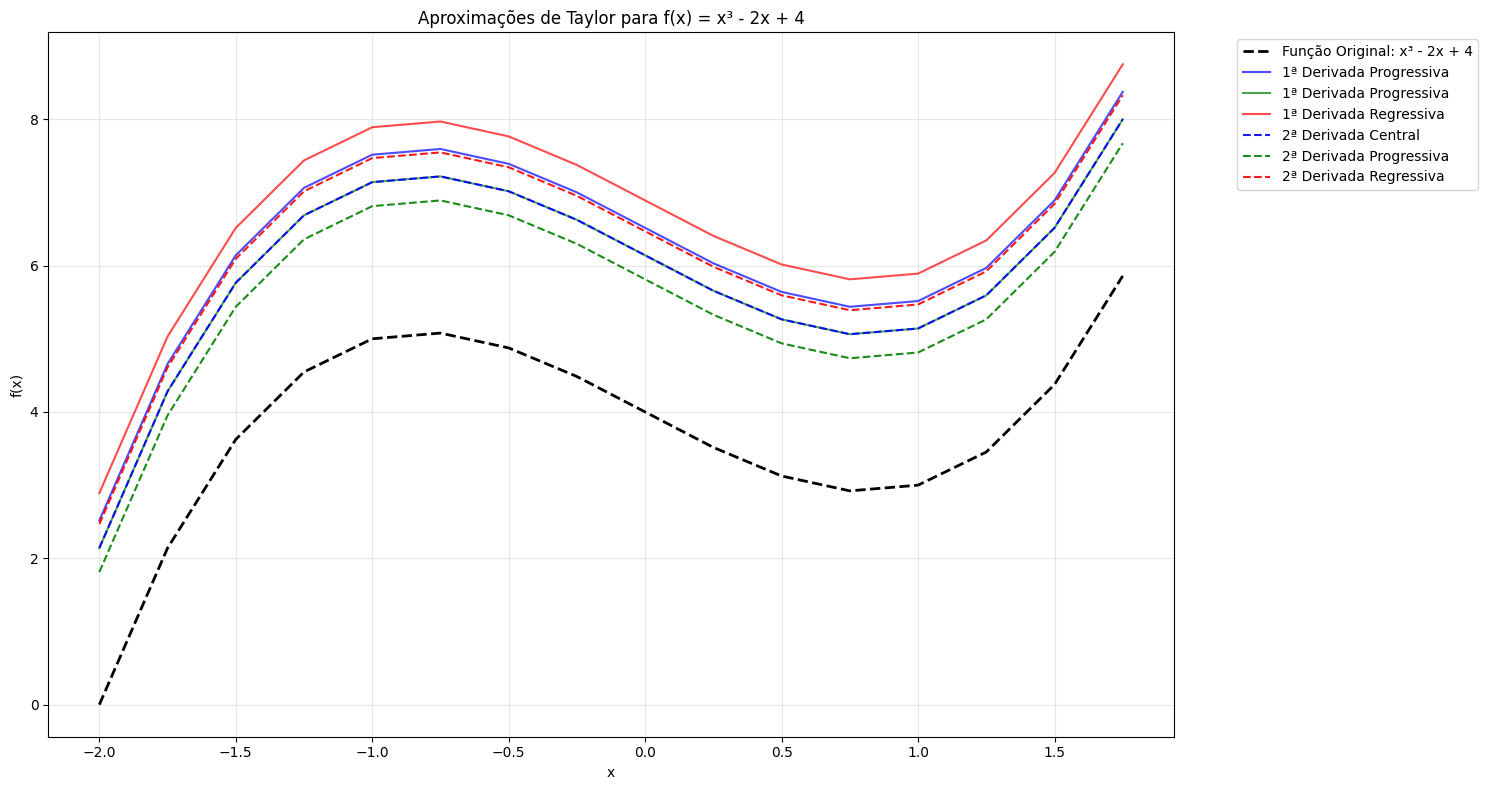

In [6]:
plt.figure(figsize=(15, 8))

# Função original
plt.plot(space, function_vals, 'k--', label='Função Original: x³ - 2x + 4', linewidth=2)

# Primeira ordem
plt.plot(space, taylorCentralPrimeiraOrdem, 'b-', label='1ª Derivada Progressiva', alpha=0.7)
plt.plot(space, taylorProgressivoPrimeiraOrdem, 'g-', label='1ª Derivada Progressiva', alpha=0.7)
plt.plot(space, taylorRegressivoPrimeiraOrdem, 'r-', label='1ª Derivada Regressiva', alpha=0.7)

# Segunda ordem
plt.plot(space, taylorCentralSegundaOrdem, 'b--', label='2ª Derivada Central', alpha=0.9)
plt.plot(space, taylorProgressivoSegundaOrdem, 'g--', label='2ª Derivada Progressiva', alpha=0.9)
plt.plot(space, taylorRegressivoSegundaOrdem, 'r--', label='2ª Derivada Regressiva', alpha=0.9)

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Aproximações de Taylor para f(x) = x³ - 2x + 4')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Questão 2. Foram coletados os seguintes dados para a distância percorrida
em função do tempo para um foguete:
t, s 0 25 50 75 100 125
y, km 0 32 58 78 92 100
Use a derivação numérica para obter estimativas da velocidade e da aceleração
em cada instante.

In [ ]:
derivadaTeorica = [3*x**2 - 2 for x in space]


derivadaC1 = [PrimeiraDerivadaCentrada(function, delta)(x) for x in space]
derivadaC2 = [SegundaDerivadaCentrada(function, delta)(x) for x in space]
derivadaP1 = [PrimeiraDerivadaRegressiva(function, delta)(x) for x in space]
derivadaP2 = [SegundaDerivadaRegressiva(function, delta)(x) for x in space]
derivadaR1 = [diferencaRegressivaPrimeiraOrdem(function, delta)(x) for x in space]
derivadaR2 = [diferencaRegressivaSegundaOrdem(function, delta)(x) for x in space]

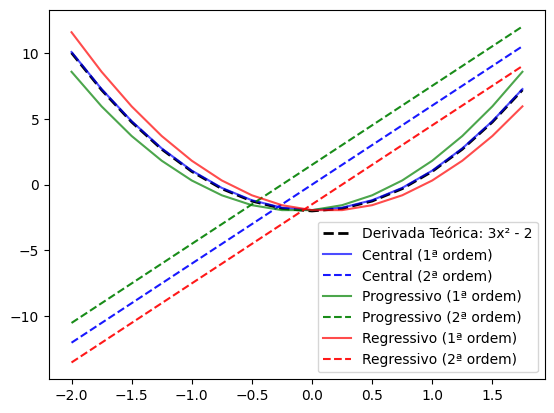

In [24]:
plt.plot(space, derivadaTeorica, 'k--', label='Derivada Teórica: 3x² - 2', linewidth=2)
plt.plot(space, derivadaC1, 'b-', label='Central (1ª ordem)', alpha=0.7)
plt.plot(space, derivadaC2, 'b--', label='Central (2ª ordem)', alpha=0.9)
plt.plot(space, derivadaP1, 'g-', label='Progressivo (1ª ordem)', alpha=0.7)
plt.plot(space, derivadaP2, 'g--', label='Progressivo (2ª ordem)', alpha=0.9)
plt.plot(space, derivadaR1, 'r-', label='Regressivo (1ª ordem)', alpha=0.7)
plt.plot(space, derivadaR2, 'r--', label='Regressivo (2ª ordem)', alpha=0.9)
plt.legend()
